# 2-D Ising Model

We will investigate the 2-d Ising model with Monte Carlo methods. Since there are many internal iterations, it is much faster to run in `C++` with `swig`. 

### Compile with swig

In [1]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

running build_ext
building '_ising' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/ising_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/ising_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c ising.cpp -o build/temp.linux-x86_64-3.7/ising.o -I./ -std=c++11 -O3
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wformat -Werror=format-s

### Import from swig

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

## Initialize the system

In [4]:
# #L = 50
# J = 1.0
# #N = 10
# T = 2.0
# H = 0.5
# MCSteps = 1000


## (a) Run simulations for various system sizes

In [5]:
# eAvgVals = []
# mAvgVals = []
# Lvals = np.arange(10,110,10)
# for L in Lvals:
#     i = ising.Ising(J, int(L), T, H)
#     i.run(MCSteps)
#     mvals = i.get_mvals()
#     plt.plot(mvals, label=(L))
#     eAvgVals.append( i.get_eAvg() )
#     mAvgVals.append( i.get_mAvg() )

# plt.legend()
# plt.ylim(-1,1)
# plt.xlabel("MC Step")
# plt.ylabel("Average magnetization")
# plt.savefig("P2-1.pdf")
# plt.show()

## (b) Run the simulations for various temperatures


Also plot the average magnetization as a function of the MC step. 

In [6]:
L = 40
J = 1.0
#N = 10
T = 1.0
H = 0.0
MCSteps = 8000

eAvgVals = []
mAvgVals = []
Hvals = np.arange(-5.0,5.0,0.1)
Hvals = np.append(Hvals,Hvals[::-1])
for H in Hvals:
    i = ising.Ising(J, L, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    #plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    mAvgVals.append( i.get_mAvg() )

#plt.legend()
# plt.ylim(-1,1)
# plt.xlabel("MC Step")
# plt.ylabel("Average magnetization")
# plt.show()

### Plot average magnetization versus temperature

In [7]:
def fit_func(T, Tc, b):
    if T <= Tc:
        return (1.0 - (np.sinh(2.0/T))**(-4) )**b
    else:
        return 0.0

def fitfunc_vec_self(T, Tc, b):
    y = np.zeros(T.shape)
    for i in range(len(y)):
        y[i]=fit_func(T[i],Tc,b)
    return y


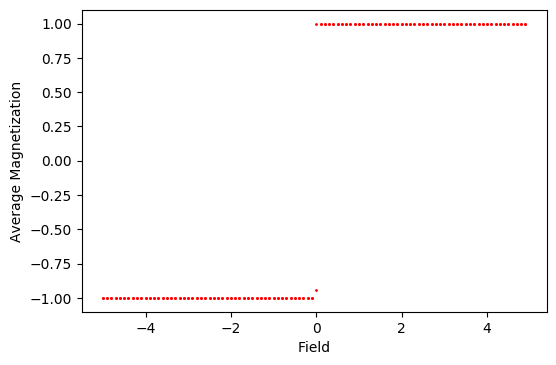

In [8]:
xvals = Hvals
yvals = mAvgVals
# popt, pcov = curve_fit(fitfunc_vec_self, xvals, yvals, bounds=([2.0,0.09], [2.5,0.15]) )
# print(r"Estimate for T_c = ", popt[0])
# print(r"Estimate for beta = ", popt[1])
plt.scatter(xvals, yvals , c= 'red', s= 1.0, label=r'\langle m \rangle')
# plt.plot(xvals, fitfunc_vec_self(xvals, *popt), label = 'Fit')
#plt.plot(xvals, fitfunc(xvals, *popt), label = 'Fit')
plt.xlabel("Field")
plt.ylabel("Average Magnetization")
plt.savefig("P2-2.pdf")
plt.show()

## (c) Average energy per spin

In [9]:
Eavgval = np.abs(eAvgVals)
plt.scatter(Tvals, Eavgval , c= 'red', s= 1.0, label=r'\langle E \rangle')
plt.xlabel("Temperature")
plt.ylabel(r'$\langle E \rangle$')
plt.savefig("P2-3.pdf")
plt.show()

NameError: name 'Tvals' is not defined

In [ ]:
def find_Der(yvals, xvals):
    ''' f     : name of function to be differentiated
        x     : the point at which df/dx is required
        h     : step size
    '''
    
    nn = len(yvals)
    dfdx = np.zeros(nn)
    #for i in range(2,nn-2):
        #dfdx[i+2] = ( yvals[i-2] - 8*yvals[i-1] + 8*yvals[i+1] - yvals[i+2]) / (12*(xvals[i+1] - xvals[i]) )
    for i in range(0,nn-1):    
        dfdx [i+1] = (yvals[i+1] -yvals[i])/(xvals[i+1] - xvals[i])
    return dfdx


In [ ]:
dEdT = find_Der(eAvgVals, Tvals)
plt.scatter(Tvals, dEdT , c= 'red', s= 1.0)
#plt.plot(Tvals,dEdT)
plt.xlabel("Temperature")
plt.ylabel(r'$\frac{d\langle E \rangle}{dT}$')
plt.savefig("P2-4.pdf")
plt.show()